In [1]:
%%markdown
# **Titanic notebook** <br> 
Titanic competition in Kaggle *https://www.kaggle.com/c/titanic/*<br>
## **Overview:**
### *I- Descriptive analysis and Data visualization*
### *II- Data preprocessing*
### *III- Machine Learning algorithms with sklearn and xgboost*
### *IV- Deep Learning Classification with Pytorch*


# **Titanic notebook** <br> 
Titanic competition in Kaggle *https://www.kaggle.com/c/titanic/*<br>
## **Overview:**
### *I- Descriptive analysis and Data visualization*
### *II- Data preprocessing*
### *III- Machine Learning algorithms with sklearn and xgboost*
### *IV- Deep Learning Classification with Pytorch*


In [2]:
### Imports
## Utils
import pandas as pd #For dataframes manipulations
import numpy as np 
from IPython.display import display
from collections import namedtuple

##Data visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

#########################

##Machine learning imports
#Preprocessing
from sklearn.preprocessing import LabelEncoder # label encoder for our categorical data
from sklearn.model_selection import train_test_split # Data splitting into train and validation sets 
#Classifiers
from sklearn.linear_model import LogisticRegression # Logistic Regression 
from sklearn.ensemble import RandomForestClassifier # Random Forest 
from sklearn.tree import DecisionTreeClassifier # Decision tree
import xgboost # Xgboost  
#Accuracy Metric 
from sklearn.metrics import accuracy_score # To calculate accuracies

#########################

##Deep learning imports (PyTorch)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

%matplotlib inline

In [3]:
#Import our datasets : training and testing
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
dataset = [train_set, test_set]

In [4]:
%%markdown
## **Descriptive analysis and Data visualization**

## **Descriptive analysis and Data visualization**


In [5]:
print("Columns of training dataset")
print(train_set.columns.values)
print("----------------------------------------------\n\n")
print("Training dataset info")
display(train_set.info())
print("----------------------------------------------\n\n")
print("training dataset description")
display(train_set.describe())
print("----------------------------------------------\n\n")
print("training dataset description of columns of type object")
display(train_set.describe(include=['object'])) #description of categorical columns

Columns of training dataset
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
----------------------------------------------


Training dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

----------------------------------------------


training dataset description


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----------------------------------------------


training dataset description of columns of type object


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


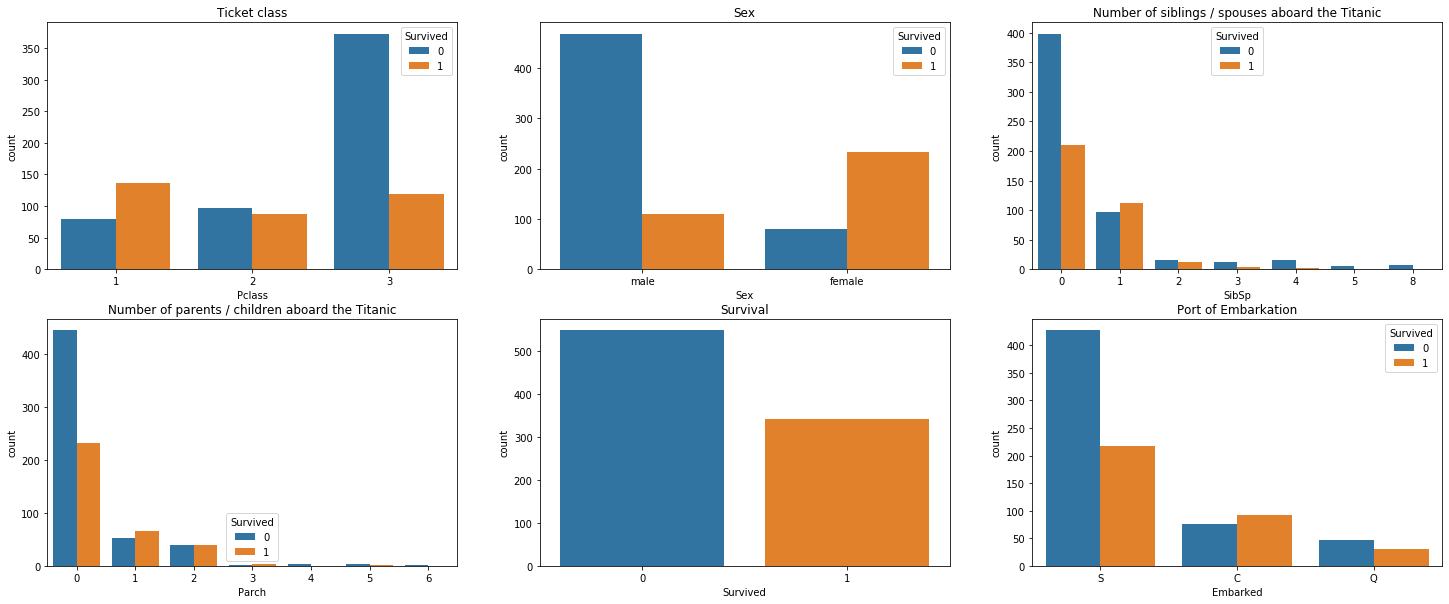

In [6]:
"""
the commented lines are another way to visualise the data which bigger plots 
"""
##Survived by Pclass
#plt.figure(figsize=(30,20))
#plt.subplot(2, 2, 1)
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
ax = sns.countplot(x="Pclass", hue="Survived", data=train_set).set_title('Ticket class')

##Survived by Sex
#plt.subplot(2, 2, 2)
plt.subplot(2, 3, 2)
sns.countplot(train_set['Sex'], hue="Survived", data=train_set).set_title('Sex')
#plt.show()

##Survived by SibSp
#plt.figure(figsize=(30,20))
#plt.subplot(2, 2, 1)
plt.subplot(2, 3, 3)
sns.countplot(train_set['SibSp'], hue="Survived", data=train_set).set_title('Number of siblings / spouses aboard the Titanic')

##Survived by Parch
#plt.subplot(2, 2, 2)
plt.subplot(2, 3, 4)
sns.countplot(train_set['Parch'], hue="Survived", data=train_set).set_title('Number of parents / children aboard the Titanic')
#plt.show()

##Survived or not
#plt.figure(figsize=(30,20))
#plt.subplot(2, 2, 1)
plt.subplot(2, 3, 5)
sns.countplot(train_set['Survived']).set_title('Survival')

##Survived by Embarked
#plt.subplot(2, 2, 2)
plt.subplot(2, 3, 6)
sns.countplot(train_set['Embarked'], hue="Survived", data=train_set).set_title('Port of Embarkation')
plt.show()


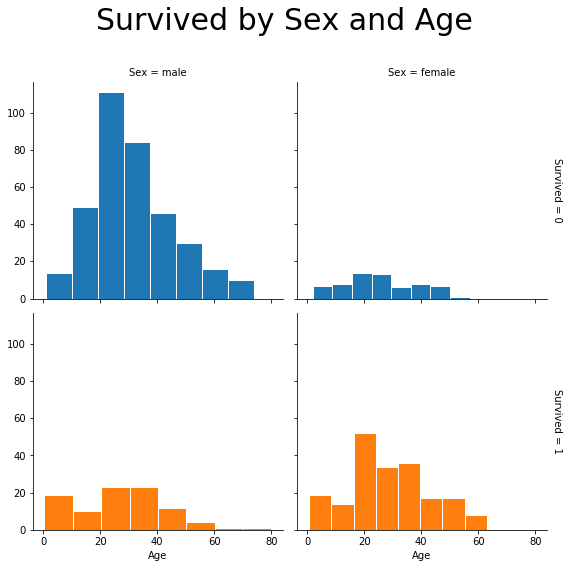

In [7]:
g = sns.FacetGrid(train_set,height=4, col="Sex", row="Survived", margin_titles=True, hue = "Survived")
g = g.map(plt.hist, "Age", edgecolor = 'white', bins = 8)
g.fig.suptitle("Survived by Sex and Age", size = 30)
plt.subplots_adjust(top=0.85)

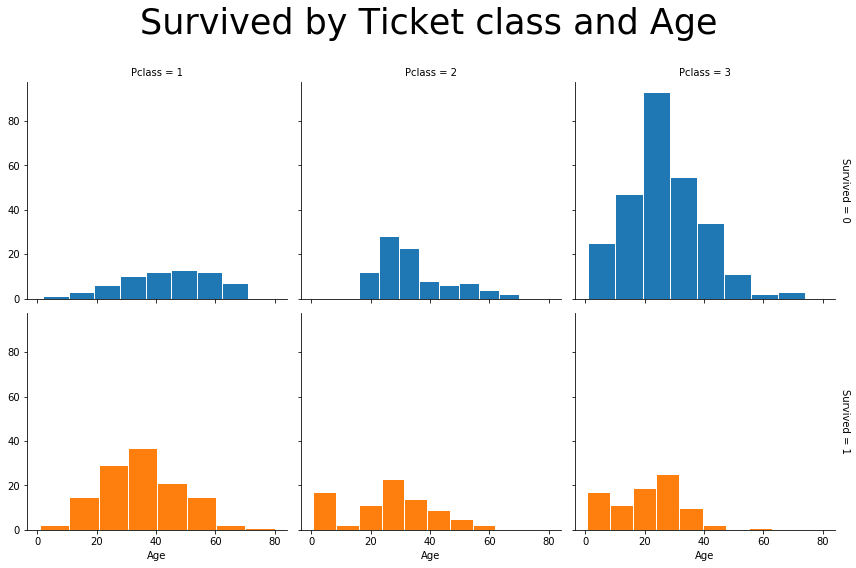

In [8]:
g = sns.FacetGrid(train_set,height=4, col="Pclass", row="Survived", margin_titles=True, hue = "Survived")
g = g.map(plt.hist, "Age", edgecolor = 'white', bins = 8)
g.fig.suptitle("Survived by Ticket class and Age", size = 35)
plt.subplots_adjust(top=0.85)

In [9]:
#missing values
def missing_values_df(df):
    """
    :input df: (Dataframe) input dataframe 
    :output output_df: (Dataframe) dataframe of missing values and there percentage 
    """
    missing_values = df.isnull().sum().sort_values(ascending = False)
    missing_values = missing_values[missing_values>0]
    ratio = missing_values/len(df)*100
    output_df= pd.concat([missing_values, ratio], axis=1, keys=['Total missing values', 'Percentage'])
    return output_df
print('Missing values in the columns of training dataset with percentage')
display(missing_values_df(train_set))
print('\n------------------------------------------------\n')
print('Missing values in the columns of test dataset with percentage')
display(missing_values_df(test_set))

Missing values in the columns of training dataset with percentage


,Total missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467



------------------------------------------------

Missing values in the columns of test dataset with percentage


,Total missing values,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


In [10]:
%%markdown
## **Data Preprocessing**
1) fill the *NaN* values with mean (*Age feature*) our more frequent values (*Embarked feature*) <br>
2) Add *titles* of passengers from names then delete names <br>
3) Encode categorical features into integers <br>
4) make 4 bins of age to categorize it <br>
5) Normalize our datasets(training_set and test_set)<br>
6) Split our training set into training and validation sets (80%/20%) <br>

## **Data Preprocessing**
1) fill the *NaN* values with mean (*Age feature*) our more frequent values (*Embarked feature*) <br>
2) Add *titles* of passengers from names then delete names <br>
3) Encode categorical features into integers <br>
4) make 4 bins of age to categorize it <br>
5) Normalize our datasets(training_set and test_set)<br>
6) Split our training set into training and validation sets (80%/20%) <br>


In [11]:
for i in range(len(dataset)):
    freq_port = dataset[i]['Embarked'].dropna().mode()[0]
    dataset[i]['Embarked'] = dataset[i]['Embarked'].fillna(freq_port)
    dataset[i] = dataset[i].fillna(dataset[i].mean())

In [12]:
print("Titels of passengers by sex")
dataset[0]['Title'] = dataset[0].Name.str.extract(' ([A-Za-z]+)\.', expand=False)
display(pd.crosstab(dataset[0]['Sex'], dataset[0]['Title']))

Titels of passengers by sex


Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [13]:
for i, data in enumerate(dataset):
    dataset[i]['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #pd.crosstab(dataset[0]['Title'], dataset[0]['Sex'])
    dataset[i]['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
                                                 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset[i]['Title'] = data['Title'].replace('Mlle', 'Miss')
    dataset[i]['Title'] = data['Title'].replace('Ms', 'Miss')
    dataset[i]['Title'] = data['Title'].replace('Mme', 'Mrs')
    print(dataset[i]['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [14]:
encoder=LabelEncoder()
categoricalFeatures = dataset[0].select_dtypes(include=['object']).columns
for i, data in enumerate(dataset):
    data[categoricalFeatures]=data[categoricalFeatures].astype(str)
    encoded = data[categoricalFeatures].apply(encoder.fit_transform)
    for j in categoricalFeatures:
        dataset[i][j]=encoded[j]
dataset[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,3
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,2


In [15]:
bins = [0,15,30,50,80]
labels = [1,2,3,4]
for i, data in enumerate(dataset):
    dataset[i] = dataset[i].drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    dataset[i]['Age']=pd.cut(dataset[i]['Age'],bins=bins ,labels=labels)
    dataset[i]['Age']=dataset[i]['Age'].astype('int64')
print('training dataset:')
display(dataset[0].head())
print('testing dataset:')
display(dataset[1].head())

training dataset:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,2,1,0,7.2500,2,2
1,1,1,0,3,1,0,71.2833,0,3
2,1,3,0,2,0,0,7.9250,2,1
3,1,1,0,3,1,0,53.1000,2,3
4,0,3,1,3,0,0,8.0500,2,2


testing dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,3,0,0,7.8292,1,2
1,3,0,3,1,0,7.0000,2,3
2,2,1,4,0,0,9.6875,1,2
3,3,1,2,0,0,8.6625,2,2
4,3,0,2,1,1,12.2875,2,3


In [16]:
#Normalizing our inout data in training and testing dataset
X=dataset[0].iloc[:, 1:]
Y=dataset[0].iloc[:, 0]
x_test=dataset[1].iloc[:, 0:]
normalized_data = X
normalized_data=normalized_data.append(x_test)
normalized_x_train = normalized_data.values
normalized_x_train /= np.max(np.abs(normalized_x_train),axis=0)

X = pd.DataFrame(normalized_x_train[:891,:], 
                      columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'])
print(X.head())
print(len(X))
x_test = pd.DataFrame(normalized_x_train[891:,:], 
                      columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'])
display(x_test.head())
print(len(x_test))
display(X.columns)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Title
0  1.000000  1.0  0.50  0.125    0.0  0.014151       1.0   0.50
1  0.333333  0.0  0.75  0.125    0.0  0.139136       0.0   0.75
2  1.000000  0.0  0.50  0.000    0.0  0.015469       1.0   0.25
3  0.333333  0.0  0.75  0.125    0.0  0.103644       1.0   0.75
4  1.000000  1.0  0.75  0.000    0.0  0.015713       1.0   0.50
891
     Pclass  Sex   Age  SibSp     Parch      Fare  Embarked  Title
0  1.000000  1.0  0.75  0.000  0.000000  0.015282       0.5   0.50
1  1.000000  0.0  0.75  0.125  0.000000  0.013663       1.0   0.75
2  0.666667  1.0  1.00  0.000  0.000000  0.018909       0.5   0.50
3  1.000000  1.0  0.50  0.000  0.000000  0.016908       1.0   0.50
4  1.000000  0.0  0.50  0.125  0.111111  0.023984       1.0   0.75
418


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

In [17]:
# Split our training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20)
print("Training set shape: "+str(X_train.shape))
print("Validation set shape: "+str(X_val.shape))

Training set shape: (712, 8)
Validation set shape: (179, 8)


In [21]:
%%markdown
## Machine learning algorithms for classification
1) Logistic Regression <br>
2) Decision Tree <br>
3) Random Forest <br>
4) XGBoost <br>

## Machine learning algorithms for classification
1) Logistic Regression <br>
2) Decision Tree <br>
3) Random Forest <br>
4) XGBoost <br>


In [32]:
accuracies_list = list()
accuracies = namedtuple('accuracies',('Model', 'accuracy'))


In [33]:
%%markdown
#### Logistic Regression

#### Logistic Regression


In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
accuracies_list.append(accuracies('Logistic Regression', acc_log))

In [35]:
%%markdown
## Decision Tree

## Decision Tree


In [36]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
accuracies_list.append(accuracies('Decision Tree', acc_decisiontree))

74.3


In [37]:
%%markdown
#### Random Forest

#### Random Forest


In [38]:

clf = RandomForestClassifier(max_depth=10, max_leaf_nodes =20,random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_val)
acc_random_forest = round(accuracy_score(y_pred, y_val) * 100, 2)
accuracies_list.append(accuracies('Random Forest', acc_random_forest))

In [39]:
%%markdown
#### XGBoost

#### XGBoost


In [40]:
xgb = xgboost.XGBClassifier(random_state=5,learning_rate=0.01)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
acc_xgb = round(accuracy_score(y_pred, y_val) * 100, 2)
accuracies_list.append(accuracies('XGBoost', acc_xgb))

In [42]:
accuracies_list

[accuracies(Model='Logistic Regression', accuracy=81.74),
 accuracies(Model='Decision Tree', accuracy=74.3),
 accuracies(Model='Random Forest', accuracy=77.09),
 accuracies(Model='XGBoost', accuracy=79.33)]

In [41]:
%%markdown
## **Deep learning for binary classification with pytorch**
1) Declare consts <br>
2) Training Set && Testing Set preparation for pytorch <br>
3) Define our DL model class <br>
4) Instantiate our model, loss and optimizer <br>
5) Define fit function <br>
6) Training process <br>
7) Define Predict Function <br>
8) Preprare for submission <br>

## **Deep learning for binary classification with pytorch**
1) Declare consts <br>
2) Training Set && Testing Set preparation for pytorch <br>
3) Define our DL model class <br>
4) Instantiate our model, loss and optimizer <br>
5) Define fit function <br>
6) Training process <br>
7) Define Predict Function <br>
8) Preprare for submission <br>


In [43]:
#Constants
BATCH_SIZE = 1
LEARNING_RATE = 0.001
EPOCHS = 800
INPUT_NODES = 8

In [44]:
## Training Set && Testing Set preparation for pytorch 

#Create Tensors from our dataframes
X_train_torch = torch.from_numpy(X_train.values).type(torch.FloatTensor) # Train X
y_train_torch = torch.from_numpy(y_train.values).type(torch.LongTensor) # Train Y
X_val_torch = torch.from_numpy(X_val.values).type(torch.FloatTensor) # Validate X
y_val_torch = torch.from_numpy(y_val.values).type(torch.LongTensor) # Validate Y
x_test_torch = torch.from_numpy(x_test.values).type(torch.FloatTensor) # Test X

#Create Tensordatasets for pytorch
train = torch.utils.data.TensorDataset(X_train_torch,y_train_torch) # Train
val = torch.utils.data.TensorDataset(X_val_torch, y_val_torch) # Validate
test = torch.utils.data.TensorDataset(x_test_torch) # Test

#Create data loaders
data_loader = torch.utils.data.DataLoader(train) # Train
val_loader = torch.utils.data.DataLoader(val) # Validate
test_loader = torch.utils.data.DataLoader(test) # Test

In [45]:
%%markdown 
### **Define model Class**
Input Features --> Fully Connected layer(512 nodes) --> Dropout(50%) --> Fully Connected layer(256 nodes) --> Dropout(50%) --> Fully Connected layer(128 nodes) --> Dropout(50%) --> Fully Connected layer(1 node)

### **Define model Class**
Input Features --> Fully Connected layer(512 nodes) --> Dropout(50%) --> Fully Connected layer(256 nodes) --> Dropout(50%) --> Fully Connected layer(128 nodes) --> Dropout(50%) --> Fully Connected layer(1 node)


In [46]:
class Titanic_NN(nn.Module):
    """
    Class for our Neural network to make best predictions ever ya jean in the titanic dataset
    3 fully connected hidden Layers + output Layer with dropout of 0.5 probability each.
    We have 8 input nodes and 1 output node (1 if >0.5 else 0)
    NB: We didn't use batch normalization because we didn't use batches.
    """
    def __init__(self, INPUT_NODES):
        super(Titanic_NN, self).__init__()
        self.fc1 = nn.Linear(INPUT_NODES,512)
        #self.batcTitanic_NNh_norm1 = nn.BatchNorm1d(1)
        self.fc2 = nn.Linear(512,256)
        #self.batch_norm2 = nn.BatchNorm1d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128,1)

    def forward(self, x):
        x = self.fc1(x)
        #x = self.batch_norm1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #x = self.batch_norm2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        
        return F.sigmoid(x)

In [47]:
#Model - Loss - Optimizer
# Instantiate our class Titanic_NN
model = Titanic_NN(INPUT_NODES)
try: #if we have a trained model, we load it
    model.load_state_dict(torch.load('titanic_model_4layers'))
except:
    pass

#Binary Classification Entropy Loss
error = nn.BCELoss()

#SGD Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
print(model)

Titanic_NN(
  (fc1): Linear(in_features=8, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


In [48]:
def fit(model, data, phase='training', batch_size = 1, is_cuda=False, input_dim = 8):
    """
    Method to train the model
    :input model:(Titanic_NN) Our model (in this case is the Titanic_NN model class)
    :input data:(dataLoader) our training / validation data to train the model on and validate
    :input phase: (String) 'training' to train model 'validation' to make predictions and validate the model
    :input batch_size: (int) batch size we feed to our neural network
    :input is_cuda: (Bool) wheather to use cuda or not (GPU) (still not implemented)
    :input input_dim: (int) number of input nodes
    :return loss: (float) loss value for one epoch
    :return accuracy: (float) accuracy value for one epoch
    """
    if phase == 'training':
        model.train()
    elif phase == 'validation':
        model.eval()
    loss_values = 0.0
    correct_values = 0
    for batch_idx, (features, label) in enumerate(data):
        if is_cuda:
            features, label = features.cuda(), label.cuda()
        features, label = Variable(features.view(batch_size, 1, input_dim)), Variable(label.float().view(-1, 1))
        if phase == 'training':
            optimizer.zero_grad() 
        output = model(features) #make one forward pass
        loss = error(output, label) #calculate loss for one forxard pass
        loss_values += loss.data
        if output[0] > 0.5:
            predictions = torch.Tensor([1])
        else:
            predictions = torch.Tensor([0])
        correct_values += predictions.eq(label.data.view_as(predictions)).cpu().sum()
        if phase == 'training':
            loss.backward() #
            optimizer.step()  # make one gradient step
    loss = loss_values / len(data.dataset) # calculate loss mean for the epoch
    accuracy = 100. * correct_values / len(data.dataset) #calculate accuracy
    if phase == 'validation':
        print(f'\n{phase} loss is {loss:{5}.{2}} and {phase} accuracy is \
              {accuracy:{10}.{4}}\n=============================================') #we can choose to print both phases
    return loss, accuracy

In [ ]:
#Training process
#validation / traing lists for accuracy and loss values during training
train_loss_list, val_loss_list = [], []
train_accuracy_list, val_accuracy_list = [], []

for epoch in range(EPOCHS):
    print(epoch)
    #Training
    train_epoch_loss, train_epoch_accuracy = fit(model, data_loader, batch_size=BATCH_SIZE, input_dim=INPUT_NODES) 
    #Validating
    val_epoch_loss, val_epoch_accuracy = fit(model, val_loader, phase='validation', batch_size=BATCH_SIZE, input_dim=INPUT_NODES)
    if epoch % 50 == 0:
        torch.save(model.state_dict(), 'titanic_model_4layers')
    train_loss_list.append(train_epoch_loss)
    train_accuracy_list.append(train_epoch_accuracy)
    val_loss_list.append(val_epoch_loss)
    val_accuracy_list.append(val_epoch_accuracy)

0


C:\Users\Administrator\AppData\Local\conda\conda\envs\titanic\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Administrator\AppData\Local\conda\conda\envs\titanic\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)



validation loss is  0.66 and validation accuracy is                    62.01
1

validation loss is  0.65 and validation accuracy is                    62.01
2

validation loss is  0.64 and validation accuracy is                    62.01
3

validation loss is  0.63 and validation accuracy is                    62.01
4

validation loss is  0.62 and validation accuracy is                    62.01
5

validation loss is  0.62 and validation accuracy is                    62.01
6

validation loss is  0.61 and validation accuracy is                    62.01
7

validation loss is   0.6 and validation accuracy is                    62.01
8

validation loss is  0.58 and validation accuracy is                    65.92
9

validation loss is  0.57 and validation accuracy is                    65.92
10

validation loss is  0.56 and validation accuracy is                    70.95
11

validation loss is  0.55 and validation accuracy is                    77.65
12

validation loss is  0.54 and validat

In [ ]:
accuracies_list.append('Neural Network __Validation_Set__', val_accuracy_list[-1])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1.000000,1.0,0.666667,0.000,0.000000,0.015282,0.333333,0.50
1,1.000000,0.0,0.666667,0.125,0.000000,0.013663,0.666667,0.75
2,0.666667,1.0,1.000000,0.000,0.000000,0.018909,0.333333,0.50
3,1.000000,1.0,0.666667,0.000,0.000000,0.016908,0.666667,0.50
4,1.000000,0.0,0.666667,0.125,0.111111,0.023984,0.666667,0.75
...,...,...,...,...,...,...,...,...
413,1.000000,1.0,0.666667,0.000,0.000000,0.015713,0.666667,0.50
414,0.333333,0.0,0.666667,0.000,0.000000,0.212559,0.000000,1.00
415,1.000000,1.0,0.666667,0.000,0.000000,0.014151,0.666667,0.50
416,1.000000,1.0,0.666667,0.000,0.000000,0.015713,0.666667,0.50


In [666]:
def predict(model, data):
    """
    Make predictions on the test dataset
    :input model: (Titanic_NN) our model DL to make predictions with
    :input data: (torch.utils.data.DataLoader) our test data loader
    :output test_predictions: (list()) list of predictions
    """
    model.eval()
    test_predictions = list()
    for batch_idx, (feature,) in enumerate(data):
        feature = Variable(feature.view(1, 1, INPUT_NODES))
        output = model(feature)
        if output[0] > 0.5:
            prediction = 1
        else:
            prediction = 0
        test_predictions.append(prediction)
    return test_predictions

In [668]:
#create our dataframe of predictions and indices from test_set
#our_predictions = predict(model, test_loader)
pred_df = pd.DataFrame(np.c_[np.arange(892, len(test_set)+892)[:,None], predict(model, test_loader)], 
                      columns=['PassengerId', 'Survived'])
#save results to a csv file
pred_df.to_csv('titanic_submission_4layers.csv', index=False)

In [8]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(train_df['Pclass'], train_df['Pclass'].values)
#for a, b in zip(train_df['Pclass'].unique(), train_df['Pclass'].value_counts()):
#    print(a,b)
#    plt.annotate(str(b), xy=(a,b))